In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_train.head()

,query_id,reply_id,query,reply,label
0,0,0,采荷一小是分校吧,杭州市采荷第一小学钱江苑校区，杭州市钱江新城实验学校。,1
1,0,1,采荷一小是分校吧,是的,0
2,0,2,采荷一小是分校吧,这是5楼,0
3,1,0,毛坯吗？,因为公积金贷款贷的少,0
4,1,1,毛坯吗？,是呢,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21585 entries, 0 to 21584
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   query_id  21585 non-null  int64 
 1   reply_id  21585 non-null  int64 
 2   query     21585 non-null  object
 3   reply     21585 non-null  object
 4   label     21585 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 843.3+ KB


* 正负样本比例

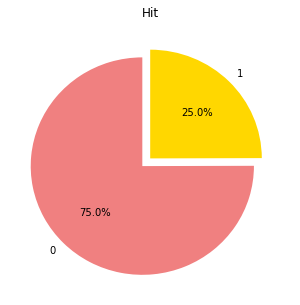

In [5]:
labels = [0,1]
sizes = df_train.label.value_counts().values
explode=[0.1,0]
colors = ['lightcoral','gold']
plt.figure(figsize=(5, 5))
patches, texts,autotexts= plt.pie(sizes, labels=labels, colors=colors, 
                                  explode=explode, autopct="%1.1f%%", startangle=90)
plt.title('Hit')
plt.show()

* 用户问题对应的回答数

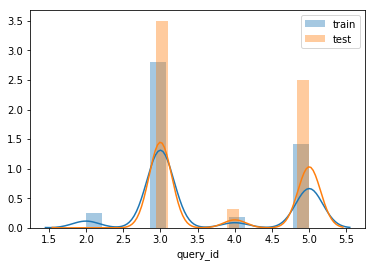

In [10]:
sns.distplot(df_train.query_id.value_counts())
sns.distplot(df_test.query_id.value_counts())
plt.legend(['train', 'test'])

* 用户问题对应的正确回答数

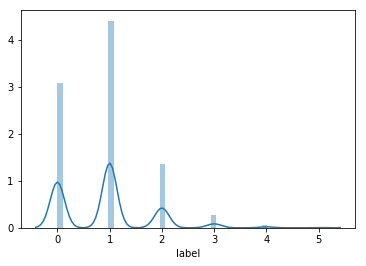

In [11]:
sns.distplot(df_train.groupby('query_id').label.agg('sum'))

* 用户问题字数

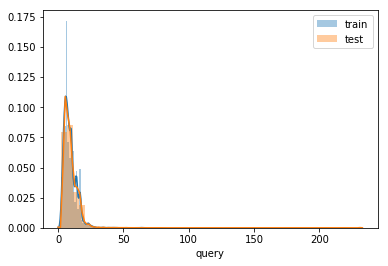

In [15]:
sns.distplot(df_train[['query_id', 'query']].drop_duplicates()['query'].map(len))
sns.distplot(df_test[['query_id', 'query']].drop_duplicates()['query'].map(len))
plt.legend(['train', 'test'])

* 经理人回答字数

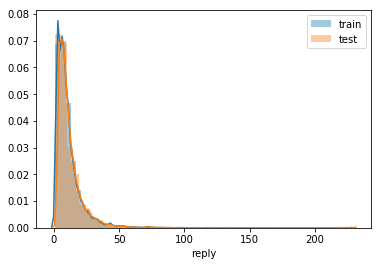

In [16]:
sns.distplot(df_train['reply'].map(len))
sns.distplot(df_test['reply'].map(len))
plt.legend(['train', 'test'])